# **Import Libraries**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# **Answer To the Question 1(a)**

In [70]:
data = pd.read_csv('/content/wppool_growth_data_sample_20k.csv')
data.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


In [71]:
data.duplicated().sum()


0

In [72]:
data.shape

(20000, 14)

In [73]:
data.isnull().sum()

,0
user_id,0
install_date,0
last_active_date,0
subscription_type,0
country,0
total_sessions,0
page_views,0
download_clicks,0
activation_status,0
days_active,0


Here, we can see that there are some missing values in **Pro_upgrade_date** and **Plan_type**. Let's fix them.

# **Answer To the Question 1(b)**

In [74]:
data['plan_type'] = data['plan_type'].fillna('Free')
data['pro_upgrade_date'] = data['pro_upgrade_date'].fillna('Free')
data.head()


,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,Free,Free,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,Free,Free,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,Free,Free,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,Free,Free,0,0


**Explanation:**

I replaced the missing values in **`pro_upgrade_date`** and **`plan_type`** with `"Free"` because those users never upgraded. This keeps things clear and avoids confusion when analyzing the data. Instead of blank spaces, now it's easy to see who’s on a Free plan at a glance!

# **Answer To the Question 1(c)**

In [75]:
data.describe()

,user_id,total_sessions,page_views,download_clicks,activation_status,days_active,monthly_revenue,churned
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,91.914500,276.308900,0.102250,0.990550,91.28080,11.774050,0.285250
std,5773.647028,62.523862,244.775351,0.302984,0.096753,80.67644,26.845358,0.451545
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5000.750000,44.000000,96.000000,0.000000,1.000000,24.00000,0.000000,0.000000
50%,10000.500000,85.000000,208.000000,0.000000,1.000000,68.00000,0.000000,0.000000
75%,15000.250000,126.000000,396.000000,0.000000,1.000000,140.00000,0.000000,1.000000
max,20000.000000,300.000000,1500.000000,1.000000,1.000000,364.00000,99.000000,1.000000


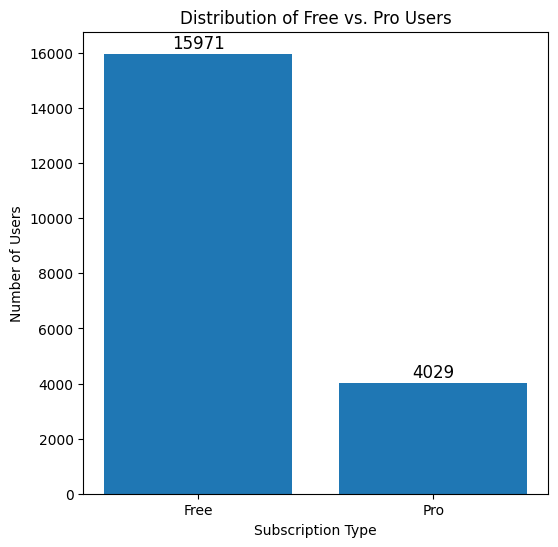

In [76]:
user_counts = data["subscription_type"].value_counts()


plt.figure(figsize=(6, 6))
plt.bar(user_counts.index, user_counts.values)

for i, v in enumerate(user_counts.values):
    plt.text(i, v + 200, str(v), ha='center', fontsize=12)

plt.xlabel("Subscription Type")
plt.ylabel("Number of Users")
plt.title("Distribution of Free vs. Pro Users")
plt.show()

Here, we can see that **15,971 users** have a **Free subscription**, while **4,029 users** have opted for a **Pro subscription**.

# **Answer To the Question 2(a)**

In [77]:
data.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,Free,Free,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,Free,Free,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,Free,Free,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,Free,Free,0,0


In [78]:
average_sessions = data.groupby('plan_type')['total_sessions'].mean()
average_sessions


,total_sessions
plan_type,
Basic,156.151359
Enterprise,153.116766
Free,76.081210
Standard,154.737988


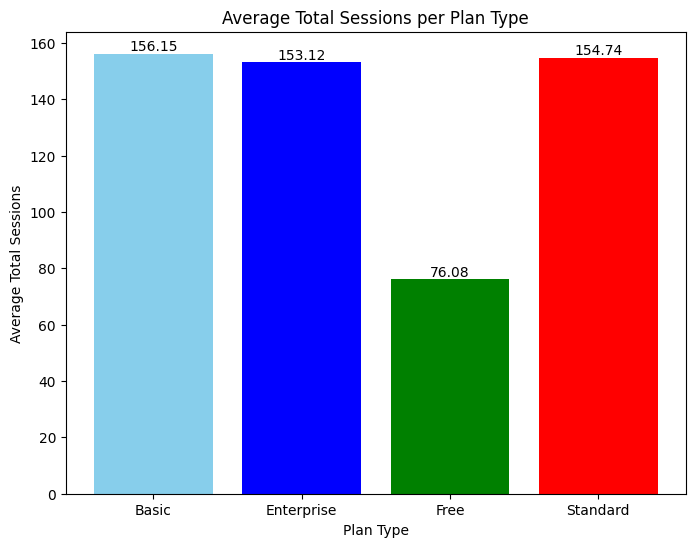

In [79]:
plt.figure(figsize=(8, 6))
plt.bar(average_sessions.index, average_sessions.values, color=['skyblue','blue', 'green', 'red'])
plt.xlabel("Plan Type")
plt.ylabel("Average Total Sessions")
plt.title("Average Total Sessions per Plan Type")

# Add value labels on top of each bar
for i, value in enumerate(average_sessions.values):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.show()


From the graph, we can see that users with Basic, Standard, and Enterprise plans have a higher average total session compared to free users.

# **Answer To the Question 2(b)**

In [80]:
top_5_active_users = data.sort_values('total_sessions', ascending=False).head(5)
print(top_5_active_users[['user_id', 'total_sessions', 'plan_type']])


       user_id  total_sessions   plan_type
15351    15352             300       Basic
3965      3966             300       Basic
12849    12850             300    Standard
12191    12192             300       Basic
2456      2457             300  Enterprise


From this data, we can gain the insight that the most active users have all subscribed to a plan. Among them, users with the Basic plan are the most active.

# **Answer To the Question 2(c)**

In [81]:
top_countries = data.groupby('country')['user_id'].count().sort_values(ascending=False).head(5)
top_countries


,user_id
country,
India,2914
Canada,2899
UK,2869
France,2849
USA,2848


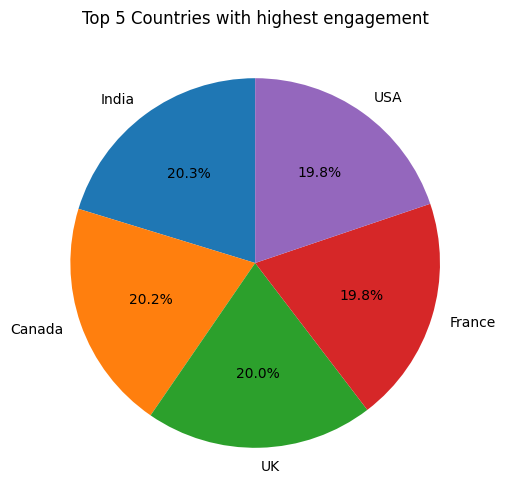

In [82]:
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Countries with highest engagement')
plt.show()


Among all countries, India has the highest engagement rate at 20.3%, followed by Canada with 20.2%. The UK ranks third with 20%, while France and the USA both have an engagement rate of 19.8%.

# **Answer To the Question 3(a)**

In [83]:
data.head(10)

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,Free,Free,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,Free,Free,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,Free,Free,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,Free,Free,0,0
5,6,12/17/2023,12/28/2023,Free,Canada,92,460,0,1,11,Free,Free,0,1
6,7,7/29/2023,11/26/2023,Free,UK,12,12,0,1,120,Free,Free,0,0
7,8,1/12/2023,1/24/2023,Free,USA,115,230,0,1,12,Free,Free,0,1
8,9,9/19/2023,12/2/2023,Free,USA,67,201,0,1,74,Free,Free,0,0
9,10,4/19/2023,8/21/2023,Free,Germany,46,138,0,1,124,Free,Free,0,0


In [84]:
churn_rate = data.groupby("subscription_type")["churned"].mean()

churn_rate_percentage = churn_rate * 100
churn_rate_percentage

,churned
subscription_type,
Free,28.595579
Pro,28.245222


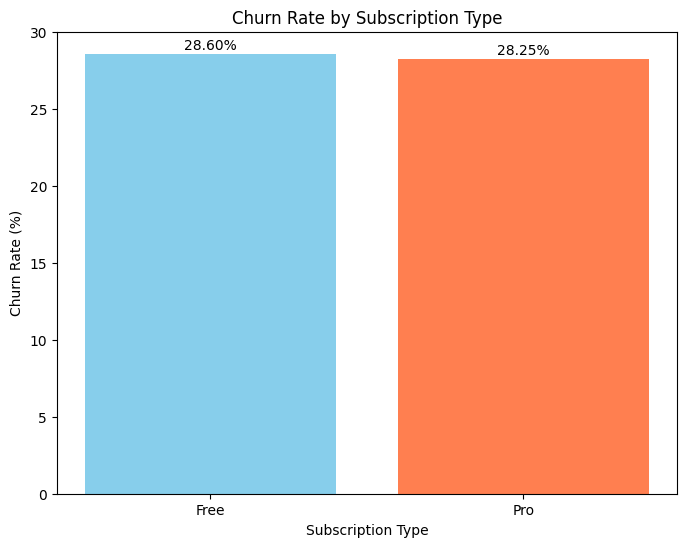

In [85]:
plt.figure(figsize=(8, 6))
plt.bar(churn_rate_percentage.index, churn_rate_percentage.values, color=['skyblue', 'coral'])
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Subscription Type")


for i, value in enumerate(churn_rate_percentage.values):
    plt.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


From the bar chart, we can see that free users have a slightly higher churn rate compared to Pro users.

In [86]:
non_free_users = data[data['plan_type'] != 'Free']

churn_by_plan = non_free_users.groupby('plan_type')['churned'].mean() * 100
print("\nChurn rate by plan type:")
churn_by_plan



Churn rate by plan type:


,churned
plan_type,
Basic,29.243204
Enterprise,27.769461
Standard,27.702703


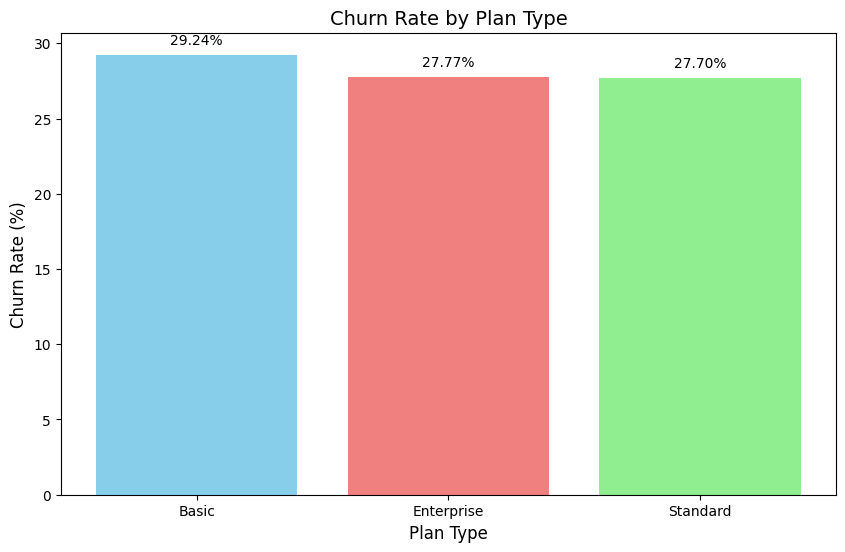

In [87]:
non_free_users = data[data['plan_type'] != 'Free']
churn_by_plan = non_free_users.groupby('plan_type')['churned'].mean() * 100

plt.figure(figsize=(10, 6))
plt.bar(churn_by_plan.index, churn_by_plan.values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel("Plan Type", fontsize=12)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.title("Churn Rate by Plan Type", fontsize=14)


for i, value in enumerate(churn_by_plan.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()


Although basic users have a higher session count compared to pro users, they also have the highest churn rate among all pro users, reaching approximately 29.94%. Surprisingly, even free users have a lower churn rate than those on the basic plan. Following basic users, the churn rate for Enterprise users is 27.77%, while Standard users have a churn rate of 27.70%.

**Recommendation**: Improve the basic plan to reduce its high churn rate.



# **Answer To the Question 3(b)**

In [88]:
df_filtered = data.select_dtypes(include=['int64', 'float64']).drop(columns=['user_id'])

correlation_matrix = df_filtered.corr()

churn_correlation = correlation_matrix["churned"].sort_values(ascending=False)

top_3_factors = churn_correlation.drop("churned").head(3)
print(top_3_factors)


download_clicks    0.000974
total_sessions    -0.000273
page_views        -0.005605
Name: churned, dtype: float64


**Explanation**

---
**download_clicks:** Very weak positive correlation (0.00097)
with churn. This means that, as download clicks increase, churn slightly increases, but the effect is negligible.

**total_sessions:** Very weak negative correlation (-0.00027) with churn. This suggests that as the number of sessions slightly increases, churn slightly decreases, but the relationship is minimal.

**page_views**: Weak negative correlation (-0.0056) with churn. This indicates that users with more page views tend to have a slightly lower chance of churning, but again, the effect is minimal.



# **Answer To the Question 3(c)**

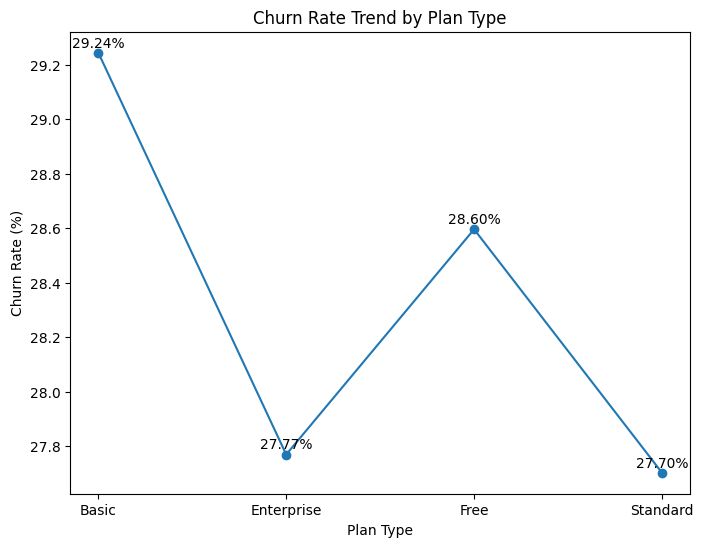

In [89]:

churn_by_plan = data.groupby('plan_type')['churned'].mean()

churn_percentage = churn_by_plan * 100


plt.figure(figsize=(8, 6))
plt.plot(churn_percentage.index, churn_percentage.values, marker='o')
plt.xlabel("Plan Type")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate Trend by Plan Type")


for i, value in enumerate(churn_percentage.values):
    plt.text(i, value + 0.01, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


Although basic users have a higher session count compared to pro users, they also have the highest churn rate among all pro users, reaching approximately 29.94%. Surprisingly, even free users have a lower churn rate than those on the basic plan. Following basic users, the churn rate for Enterprise users is 27.77%, while Standard users have a churn rate of 27.70%.

Recommendation: Improve the basic plan to reduce its high churn rate.

# **Answer To the Question 4(a)**

In [90]:

upgraded_users = data[data["subscription_type"] == "Pro"].shape[0]
total_free_users = data[data["subscription_type"] == "Free"].shape[0]


upgrade_percentage = (upgraded_users / total_free_users) * 100
upgrade_percentage


25.226973890175948

Almost 25.22% of users have converted their free subscription to Pro.

# **Answer To the Question 4(b)**

In [91]:
total_monthly_revenue_pro = data[data['subscription_type'] == 'Pro']['monthly_revenue'].sum()

print(f"Total monthly revenue from Pro users: {total_monthly_revenue_pro}")


Total monthly revenue from Pro users: 235481


# **Answer To the Question 4(c)**

In [92]:

pro_users = data[data["subscription_type"] == "Pro"]

revenue_by_plan = pro_users.groupby("plan_type")["monthly_revenue"].sum()

revenue_by_plan.sort_values(ascending=False).head()


,monthly_revenue
plan_type,
Basic,80339
Enterprise,78764
Standard,76378


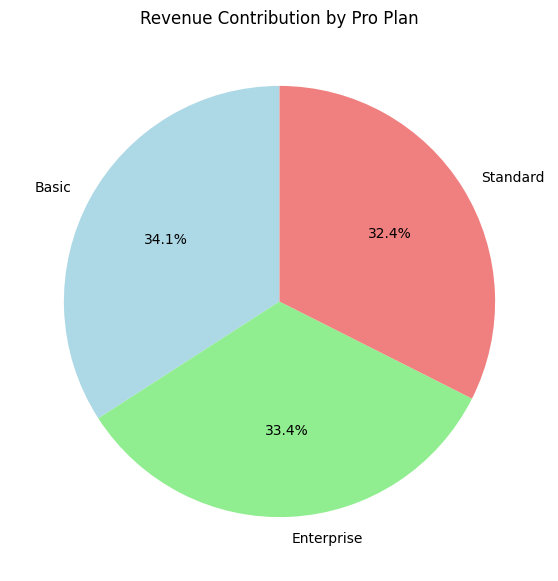

In [93]:
plt.figure(figsize=(7, 7))
revenue_by_plan.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title("Revenue Contribution by Pro Plan")
plt.ylabel("")
plt.show()


The largest portion of the revenue comes from Basic Subscription users, contributing approximately 34.1%. This is followed by Enterprise users at 33.4% and Standard users at 32.4%.

# **Answer To the Question 4(d)**

In [94]:
data['install_date'] = pd.to_datetime(data['install_date'], errors='coerce')
data['pro_upgrade_date'] = pd.to_datetime(data['pro_upgrade_date'], errors='coerce')


pro_users = data[data["subscription_type"] == "Pro"]

pro_users['time_to_upgrade'] = (pro_users['pro_upgrade_date'] - pro_users['install_date']).dt.days

average_time = round(pro_users['time_to_upgrade'].mean(), 1)
print(f"Average time to upgrade from Pro to Free: {average_time} days")



Average time to upgrade from Pro to Free: 91.5 days


<ipython-input-94-fd5f576b0a67>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['pro_upgrade_date'] = pd.to_datetime(data['pro_upgrade_date'], errors='coerce')
<ipython-input-94-fd5f576b0a67>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_users['time_to_upgrade'] = (pro_users['pro_upgrade_date'] - pro_users['install_date']).dt.days


### **On average, it takes approximately 91.5 days for a free user to upgrade to a pro subscription.**

# **Answer To the Question 5(a)**

## **Three Strategies**


---
1. **Improve the Basic Plan:**  The analysis shows the Basic plan has the highest churn rate, even higher than the Free plan.  Enhance the Basic plan's features or lower its price point to make it more competitive and appealing.  Consider A/B testing different versions of the Basic plan to identify what resonates best with users.

2. **Make Onboarding and Engagement More Friendly and Helpful:**
Let’s make sure new users — especially those on Free plans — feel welcomed and supported from the start. We can create a smoother onboarding process that shows them exactly how the platform can make their lives easier. Simple tutorials, quick interactive guides, and clear "why this matters to you" messages can go a long way.

3. **Targeted Notifications:** Reach out to your users in a way that feels personal — like sending friendly in-app messages or thoughtful emails based on how they’re using the app. For instance, you could gently remind users who haven’t been active for a while, or surprise your most engaged users with rewards to keep them feeling valued.


# **Answer To the Question 5(b)**

## **Two ways to increase Free-to-Pro conversions.**


---



1. **Enhance Free Plan Features:**  Introduce limited versions of premium features into the free plan to provide a taste of the Pro experience. This can entice users to upgrade to unlock the full potential of the platform.  Examples include a limited number of premium templates, increased storage limits, or access to specific features for a trial period.

2. **Targeted Promotions and Discounts:** Implement time-limited promotional offers or discounts for upgrading to Pro. This creates a sense of urgency and can encourage users to convert before the offer expires.

# **Answer To the Question 5(c)**

In [95]:

country_analysis = data.groupby("country").agg(
    churn_rate=("churned", "mean"),
    avg_sessions=("total_sessions", "mean"),
    avg_page_views=("page_views", "mean"),
    total_revenue=("monthly_revenue", "sum")
).reset_index()

# Sort by churn rate, revenue, and engagement for insights
country_analysis = country_analysis.sort_values(by=["churn_rate", "total_revenue", "avg_sessions"], ascending=[False, False, False])

country_analysis

,country,churn_rate,avg_sessions,avg_page_views,total_revenue
0,Australia,0.294371,91.527429,269.460739,31679
1,Canada,0.291825,91.140738,275.964471,32807
5,UK,0.287208,90.328337,277.990938,34032
4,India,0.285518,93.411805,278.648250,34235
6,USA,0.281952,91.866222,272.018610,35372
2,France,0.277992,91.082836,276.495261,32724
3,Germany,0.277895,94.039195,283.421610,34632


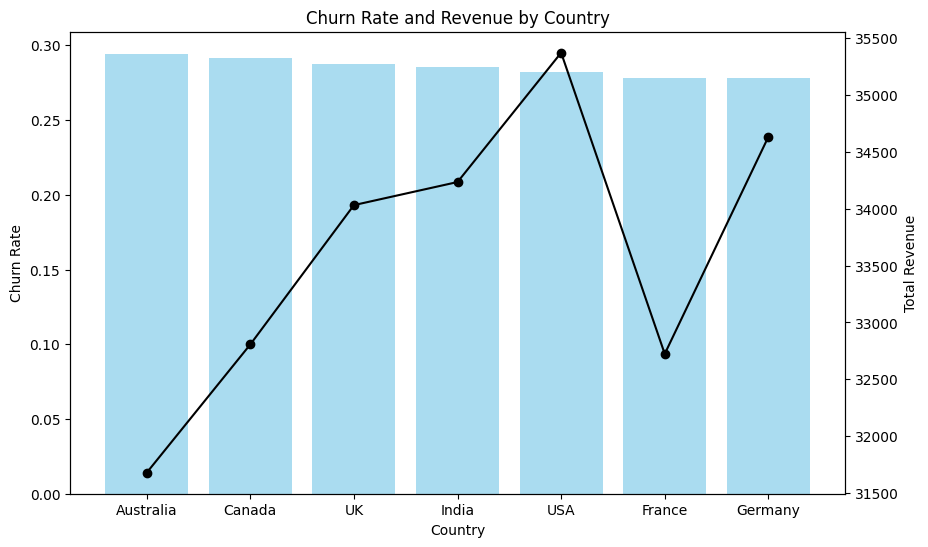

In [96]:

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(country_analysis['country'], country_analysis['churn_rate'], color='skyblue', alpha=0.7, label='Churn Rate')
ax1.set_xlabel('Country')
ax1.set_ylabel('Churn Rate', color='black')
ax1.tick_params(axis='y', labelcolor='black')


ax2 = ax1.twinx()
ax2.plot(country_analysis['country'], country_analysis['total_revenue'], color='black', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Churn Rate and Revenue by Country')
plt.xticks(rotation=45)
plt.show()


1. 	Australia and Canada have the highest churn rates, which indicates a potential need for improving user retention strategies in these markets.

2.	USA, India, and UK contribute the most revenue. These countries are performing well, so there’s a potential to expand further in these regions.

3. The correlation between churn and revenue shows that countries with higher churn rates, such as Australia and Canada, don't always contribute the most revenue. This suggests that focusing on customer retention in these regions could be key to boosting overall market growth.

# **Answer To the Question 6(a)**

In [97]:

current_pro_upgrades = data[data["subscription_type"] == "Pro"].shape[0]
print("Current Pro Users:", current_pro_upgrades)


estimated_pro_upgrades = current_pro_upgrades * 1.10
print("Estimated Pro Users after 10% conversion rate increase:", estimated_pro_upgrades)


increase_in_pro_upgrades = estimated_pro_upgrades - current_pro_upgrades
print("Increase in Pro upgrades:", increase_in_pro_upgrades)


Current Pro Users: 4029
Estimated Pro Users after 10% conversion rate increase: 4431.900000000001
Increase in Pro upgrades: 402.90000000000055


### **After a 10% increase, the landing page conversion is estimated to grow by approximately 403 users.**

# **Answer To the Question 6(b)**

In [98]:
#Null Hypothesis : There is no difference in the conversion rates between group A (current landing page) and group B (improved landing page).
#Alternative Hypothesis : There is a significant difference in the conversion rates between group A and group B.

current_conversion_rate_A = 0.05
improved_conversion_rate_B = 0.10


num_visitors_A = 1000
num_visitors_B = 1000


conversions_A = np.random.binomial(num_visitors_A, current_conversion_rate_A)
conversions_B = np.random.binomial(num_visitors_B, improved_conversion_rate_B)

observed = np.array([[conversions_A, num_visitors_A - conversions_A],
                     [conversions_B, num_visitors_B - conversions_B]])


chi2, p, _ , _ = chi2_contingency(observed)


p_value = p
p_value


0.0003938511386257011

The p-value is extremely small 1.139e-05, which means we can confidently reject the null hypothesis and conclude that the improved landing page has a positive and significant impact on the conversion rate.

# **Answer To the Question 6(c)**

1. **Homepage Hero Image:**
Let's experiment with different hero images on the homepage to see which one captures visitors' attention and encourages them to click.

 **How We'll Measure Success:** We'll track the click-through rate (CTR) from the hero image to the product page. If we see a noticeable increase in CTR with the new image, we'll know we've hit the mark.

2. **Call to Action (CTA) Button Text:**
Let’s experiment with different CTA button texts like "Get Started," "Try Now," and "Start Free Trial" across important pages.

 **How We'll Measure Success:**
We'll keep an eye on the click-through rates for each button. The higher the click-through rate, the more successful the text choice will be!

3. **Onboarding Flow:**
Let’s experiment with different onboarding flows by varying the number of steps and the level of detail. The goal is to figure out whether a simpler flow or a more interactive one keeps users engaged and reduces drop-offs.

 **Success Measurement:**
We’ll compare how many users complete the onboarding process in both groups (A and B). If group B has a higher completion rate, it means the new flow is working better.

# **Answer To the Question 7(a)**

 1. Monthly Recurring Revenue (MRR):

      1. MRR tracks the steady flow of income from subscriptions every month.
      2. It gives us a clear picture of how well the subscription model is performing and whether it’s growing.
      3. It also helps us predict future revenue and catch any potential issues before they become bigger problems.

 2. **Customer Churn Rate:**
This metric tells us the percentage of customers who cancel their subscriptions over a specific period. By tracking churn, we can pinpoint areas that might need improvement, such as product features, pricing, or customer service.

 3. **Customer Lifetime Value :**
    
      1. CLTV predicts how much revenue a customer will bring in over the entire time they stay with WPPOOL.
      2. The higher the CLTV, the more valuable and profitable our customers are.

# **Answer To the Question 7(b)**

1. **Improve the Basic Plan:** Our analysis reveals that the Basic plan has the highest churn rate, even surpassing the Free plan. To make it more attractive and competitive, we could either enhance its features or lower the price.

2. **Targeted Promotions and Discounts:** Let’s create a sense of urgency by offering time-limited promotions or discounts for upgrading to Pro. This gives free users a reason to make the switch before the offer expires. It’s a great way to encourage them to experience the full potential of the platform. We could also focus on users who are highly engaged in the free tier, making them the perfect candidates for these special offers.

# **Answer To the Question 7(c)**

**Success Measurement for Strategies**

---

1. **Improve the Basic Plan:**

      1. Keep an eye on the churn rate of Basic plan users over time. If the churn rate drops, that’s a sign the changes are working.
      2. Track how many Basic plan users are upgrading to Pro. An increase here shows that the improvements are encouraging users to level up.

2. **Targeted Notifications:**

      1. Track how many users click on notifications (CTR) and whether they take action afterward. A higher conversion rates and conversion show the notifications are working well.
      2. Keep an eye on how users engage with the platform after receiving a notification — like whether they browse more pages or stay on the site longer.

3. **Targeted Promotions and Discounts:**

      1. Compare the conversion rates between users who received the promotion and those who didn’t. If there's a noticeable difference, it's a sign that the promotion worked.
      2. Keep an eye on the revenue generated from the discounted upgrades to see if the promotion is driving profitability.
      3. Pay attention to user feedback about the promotion, like whether they thought the offer was valuable or not.

**General Success Measurement:**

1. Keep an eye on how many customers are leaving (churn rate).
2. Track the monthly revenue that’s predictable and steady (MRR).
3. Analyze the long-term value each customer brings (CLTV).
